# Data Processing in Python
Python è ormai considerato il linguaggio di programmazione standard della Data Science. Uno dei motivi che lo hanno portato ad essere tale è anche la presenza della libreria Pandas: quest'ultima permette in pochissime righe di codice di performare pressochè qualsiasi operazione su dei dati.

Quando viene iniziato un progetto di Data Science, la prima cosa che si fa è, generalmente, ispezionare i dati: importarli, riorganizzarli in modo da renderli pronti per i modelli, fare dei grafici e conteggiare anomalie o valori mancanti al loro interno.

In questo esercizio metteremo le mani su un vero dataset (qui le trovate informazioni riguardo al dataset e la sua struttura, leggete con cura: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv): vi performeremo varie operazioni, dove però vi imporrò talvolta dei vincoli sul numero di righe di codice massimo che potete scrivere, l'obiettivo dell'esercizio è infatti quello di mostrare come Pandas abbia un comando per pressoché qualsiasi operazione.

Due file .csv sono già nella stessa cartella di questo notebook: "anime.csv" e "rating.csv", scaricate tutto quanto e mettete tutto nella stessa cartella in locale.

IMPORTANTE: l'utilizzo delle librerie in Python è talvolta molto intricato e nessuno è in grado di programmare ciecamente usando una libreria. Il consiglio che vi do, valido per questo notebook ma più in generale ogni qualvolta programmerete qualcosa, è quello di cercare su internet qualcuno che abbia già fatto la stessa identica cosa che dovete fare voi. Non abbiate paura di andarvi a scrivere letteralmente su Google cose tipo "pandas how to do etc. etc.", nel 95% dei casi troverete esattamente ciò che stavate cercando, altrimenti qualcosa di simile che potrete riadattare da soli cercando nella documentazione come funzionano i comandi che vi interessano.

In [1]:
### qui potete importare tutte le librerie che vi servono
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Importare i dataset (2 righe)
anime = pd.read_csv('anime.csv', header=0)
rating = pd.read_csv('rating.csv', header=0)

In [3]:
# Visualizzare una parte di ognuno dei due dataset (2 righe)
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# Scegliere ed impostare un indice adeguato per il dataframe "anime" (1 riga)
anime.set_index('anime_id', inplace=True)
anime

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
5543,Under World,Hentai,OVA,1,4.28,183
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219


In [6]:
# Ad ora il dataframe "anime" è ordinato in base al rating (decreasing). Ordinare il dataframe alfabeticamente in base al "name"
# (1 riga)
anime.sort_values('name', inplace=True)
anime.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
20707,&quot;0&quot;,Music,Music,1,5.06,1170
25627,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,Kids,Movie,1,5.00,113
7669,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,"Comedy, Fantasy, School",OVA,1,7.06,14351
8481,&quot;Bungaku Shoujo&quot; Memoire,"Drama, Romance, School",OVA,3,7.54,18013
6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,1,7.63,40984


In [7]:
# Ci sono degli anime il cui nome non è stato correttamente encodato, rimuovere dal dataframe tutti gli anime il cui nome 
# inizia con '.' oppure '&' (1 riga)
anime.drop(anime[(anime['name'].str[0] == '&') | (anime['name'].str[0] == '.')].index, inplace=True)
anime

,name,genre,type,episodes,rating,members
anime_id,,,,,,
12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
29978,001,Comedy,ONA,1,4.00,916
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198
...,...,...,...,...,...,...
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353
4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401
29708,Üks Uks,Dementia,Movie,1,6.17,66


In [8]:
# Contare quanti Missing Values (NaN) ci sono in ogni colonna dei due dataframe (2 righe)
num_nan_anime = anime.isna().sum()
num_nan_rating = rating.isna().sum()
print(num_nan_anime, num_nan_rating)

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64 user_id     0
anime_id    0
rating      0
dtype: int64


In [9]:
# Rimuovere tutti i Nan dal dataframe "anime" (1 riga)
anime.dropna(axis=0, inplace=True)

In [10]:
# Rimuovere tutti i rating -1 dal dataframe "rating" (1 riga)
rating.drop(rating[rating['rating'] == -1].index, inplace=True)

In [11]:
# Adesso il nostro intento è utilizzare il dataframe "rating" per arricchire le informazioni contenute in "anime":
# osservare bene la struttura dei due dataframe, sebbene il rating medio per ogni anime sia già incluso nel dataframe, 
# siamo ora interessati alla deviazione standard del rating.

# Creare un dataframe che abbia come indice l'id di un anime e una colonna con all'interno la deviazione standard
# dei suoi ratings (1 riga)
std_rat = pd.DataFrame(data=rating.groupby(by=['anime_id']).std()['rating'].values, index=rating.groupby(by=['anime_id']).std().index, columns=['Std_deviation'])
std_rat

,Std_deviation
anime_id,
1,1.200112
5,1.165703
6,1.219656
7,1.389508
8,1.431292
...,...
34324,1.375103
34325,1.397276
34349,1.000000


In [12]:
# Unire al dataframe "anime" la colonna contenente le deviazioni standard dei rating: attenzione, questa deve essere ovviamente
# coerente con gli indici "anime_id". Quindi sostituire tutti i Nan che possono essersi generati (potremmo avere
# un anime senza alcun voto, oppure con uno solo, quindi deviazione standard Nan) con degli 0. Procedere infine a rimuovere 
# qualsiasi colonna
# "doppione" possa essersi generate dalla prima operazione (massimo 2 righe).
anime = anime.merge(std_rat, on='anime_id')

In [13]:
anime.fillna(0, inplace = True)
anime

,name,genre,type,episodes,rating,members,Std_deviation
anime_id,,,,,,,
29978,001,Comedy,ONA,1,4.00,916,3.465705
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307,1.675079
1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12,6.39,11097,1.497141
3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988,1.393985
28761,00:08,Dementia,Movie,1,5.21,2386,2.150530
...,...,...,...,...,...,...,...
3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13,8.34,74941,1.178987
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547,1.232423
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353,1.245483


In [14]:
# Prima di procedere oltre ispezioniamo quali tipo di variabile Pandas ha assegnato (autonomamente) ad ogni colonna,
# stampare il tipo di ogni colonna di "anime" (1 riga)
anime.dtypes

name              object
genre             object
type              object
episodes          object
rating           float64
members            int64
Std_deviation    float64
dtype: object

In [15]:
# Il tipo object è usato per le stringhe, una colonna in particolare ha un tipo assegnato che forse non è quello più corretto.
# Ispezionare tutti i possibili valori che può assumere quella colonna e trovare il motivo per cui è stata assegnata con quel 
# tipo da pandas (1 riga)
anime['episodes'].unique()  #di alcuni anime non è noto il numero di episodi e di coseguenza questo viene sostituito da unknow

array(['1', '12', '25', '2', '13', '8', '4', '3', '39', '35', '6', '15',
       '11', '7', '23', '5', '24', '48', '22', '10', '26', '51', '50',
       '178', '27', '42', '52', '31', '74', '53', '28', '43', '20', '58',
       '38', '37', '44', '54', '47', '79', '330', '104', '49', '117',
       '14', '46', '18', '45', '29', '21', '60', '16', '59', '75', '34',
       '61', '17', '366', '76', 'Unknown', '115', '128', '70', '65', '33',
       '73', '365', '180', '41', '142', '78', '170', '40', '156', '63',
       '9', '305', '151', '66', '103', '30', '163', '1787', '243', '153',
       '64', '97', '291', '100', '56', '119', '145', '175', '102', '36',
       '19', '77', '199', '108', '114', '68', '110', '113', '201', '32',
       '225', '164', '101', '140', '130', '86', '94', '1428', '109',
       '260', '62', '148', '296', '127', '312', '167', '240', '300',
       '105', '195', '203', '358', '137', '1565', '331', '373', '91',
       '55', '150', '773', '182', '155', '87', '88', '95', '96',

In [16]:
anime['type'].unique()

array(['ONA', 'Movie', 'TV', 'Special', 'OVA', 'Music'], dtype=object)

In [17]:
# Una volta trovato l'elemento di disturbo, rimuovere le righe del dataframe che presentano quel valore in quella colonna
# e cambiare il tipo della colonna con quello più appropriato (2 righe)
anime.drop(anime[anime['episodes'] == 'Unknown'].index, inplace=True)

In [18]:
anime=anime.astype({'episodes': float})

In [19]:
anime.dtypes

name              object
genre             object
type              object
episodes         float64
rating           float64
members            int64
Std_deviation    float64
dtype: object

In [20]:
# Adesso siamo interessati a fare una piccola analisi suddividendo la variabile "type".
# Fare il conteggio di quanti anime ci sono per ogni tipo (1 riga)
cnt = Counter(anime.type)
# Calcolare il rating medio per ognuno di questi tipi (1 riga)
avg_rat_type = anime.groupby('type').mean()['rating'].values
# Calcolare il numero di episodi medio per ognuno di questi tipi (1 riga)
avg_ep_type = anime.groupby('type').mean()['episodes'].values
# Calcolare il numero di utenti totale per ognuno di questi tipi (1 riga)
tot_mem_type = anime.groupby('type').mean()['members'].values
print("Number of anime per type: {}".format(cnt))
print("Average Rating per type: {}".format(avg_rat_type))
print("Average number of Episodes per type: {}".format(avg_ep_type))
print("Total number of Members per type: {}".format(tot_mem_type))

Number of anime per type: Counter({'TV': 3065, 'OVA': 2723, 'Movie': 1722, 'Special': 1440, 'ONA': 475, 'Music': 444})
Average Rating per type: [6.50487224 5.64783784 5.71242105 6.40711348 6.64605556 7.05406525]
Average number of Episodes per type: [ 1.04123113  1.09234234  5.69684211  2.51083364  2.67916667 35.44861338]
Total number of Members per type: [13771.16260163  1432.74774775  5586.04421053  7087.27947117
  8834.21666667 51266.51353997]


In [156]:
# Adesso siamo interessati a studiare i generi ("genre") degli anime. La prima cosa da fare è un "parsing" della colonna genre.
# In particolare, proveremo adesso a cambiare la struttura del dataframe, calcolando innanzitutto quanti differenti generi ci
# sono in totale, e aggiungendo quindi una colonna per ogni genere al dataframe dal contenuto binario: 1 se l'anime in quella 
# riga contiene quel genere tra i suoi e 0 altrimenti. Questa struttura ci faciliterà in alcune analisi e sostituira la colonna 
# 'genre' che è altrimenti di difficile utilizzo.

# Ottenere il conteggio delle apparizioni di tutti i differenti generi possibili (si può fare una riga ma è hardcore,
# comunque non più di 4-5 righe)
genres_count = sum([Counter(j) for j in [i.split(', ') for i in anime['genre'].values]], Counter())
print(genres_count)
# (per chi vuole provarlo a fare in una sola riga, io ho utilizzato un Counter e i metodi delle liste join, split e replace)

Counter({'Comedy': 3782, 'Action': 2519, 'Adventure': 1963, 'Sci-Fi': 1863, 'Fantasy': 1849, 'Drama': 1650, 'Shounen': 1546, 'Romance': 1383, 'School': 1081, 'Hentai': 1080, 'Slice of Life': 980, 'Supernatural': 931, 'Mecha': 869, 'Kids': 794, 'Music': 727, 'Magic': 682, 'Ecchi': 607, 'Historical': 578, 'Shoujo': 543, 'Seinen': 484, 'Mystery': 453, 'Sports': 427, 'Super Power': 409, 'Military': 401, 'Space': 338, 'Parody': 332, 'Horror': 327, 'Harem': 306, 'Demons': 268, 'Martial Arts': 230, 'Psychological': 217, 'Dementia': 192, 'Police': 177, 'Game': 137, 'Samurai': 127, 'Vampire': 96, 'Thriller': 82, 'Shounen Ai': 60, 'Shoujo Ai': 54, 'Cars': 54, 'Josei': 50, 'Yuri': 41, 'Yaoi': 37})


In [22]:
# Adesso aggiungere al dataframe una colonna per ogni genere contenenti labels binarie (1-0 oppure True-False).
# Anche qui, si può fare tutto in una riga ma è davvero intricato, usando il comando join di pandas e il metodo contains delle stringhe.
# Comunque non ci vogliono più di 4-5 righe.
anime = anime.join(pd.DataFrame({colonna:valori for (colonna,valori) in zip(genres_count.keys(), [anime['genre'].str.contains(i).astype(int) for i in genres_count.keys()])}))
anime

,name,genre,type,episodes,rating,members,Std_deviation,Comedy,Action,Adventure,...,Martial Arts,Game,Samurai,Yaoi,Yuri,Shoujo Ai,Josei,Shounen Ai,Vampire,Cars
anime_id,,,,,,,,,,,,,,,,,,,,,
29978,001,Comedy,ONA,1.0,4.00,916,3.465705,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1.0,6.76,8307,1.675079,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12.0,6.39,11097,1.497141,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1.0,6.44,2988,1.393985,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28761,00:08,Dementia,Movie,1.0,5.21,2386,2.150530,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13.0,8.34,74941,1.178987,1,0,0,...,0,0,0,0,0,0,0,0,0,0
793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1.0,8.04,41547,1.232423,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2.0,8.32,36353,1.245483,0,0,0,...,0,0,0,0,0,0,0,0,0,0


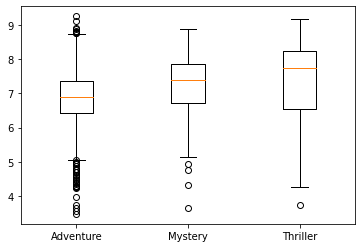

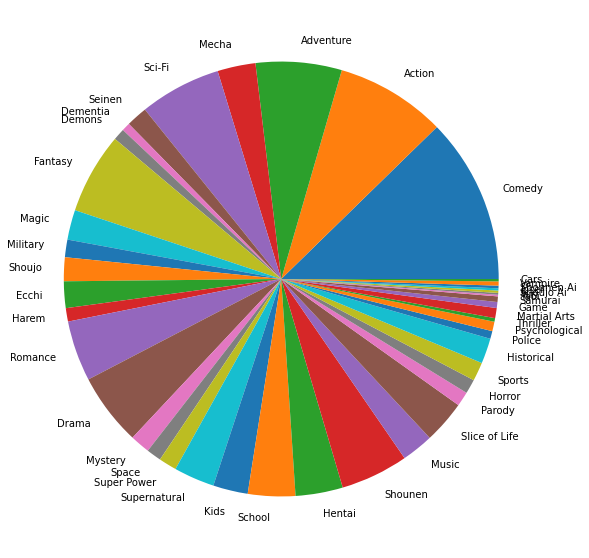

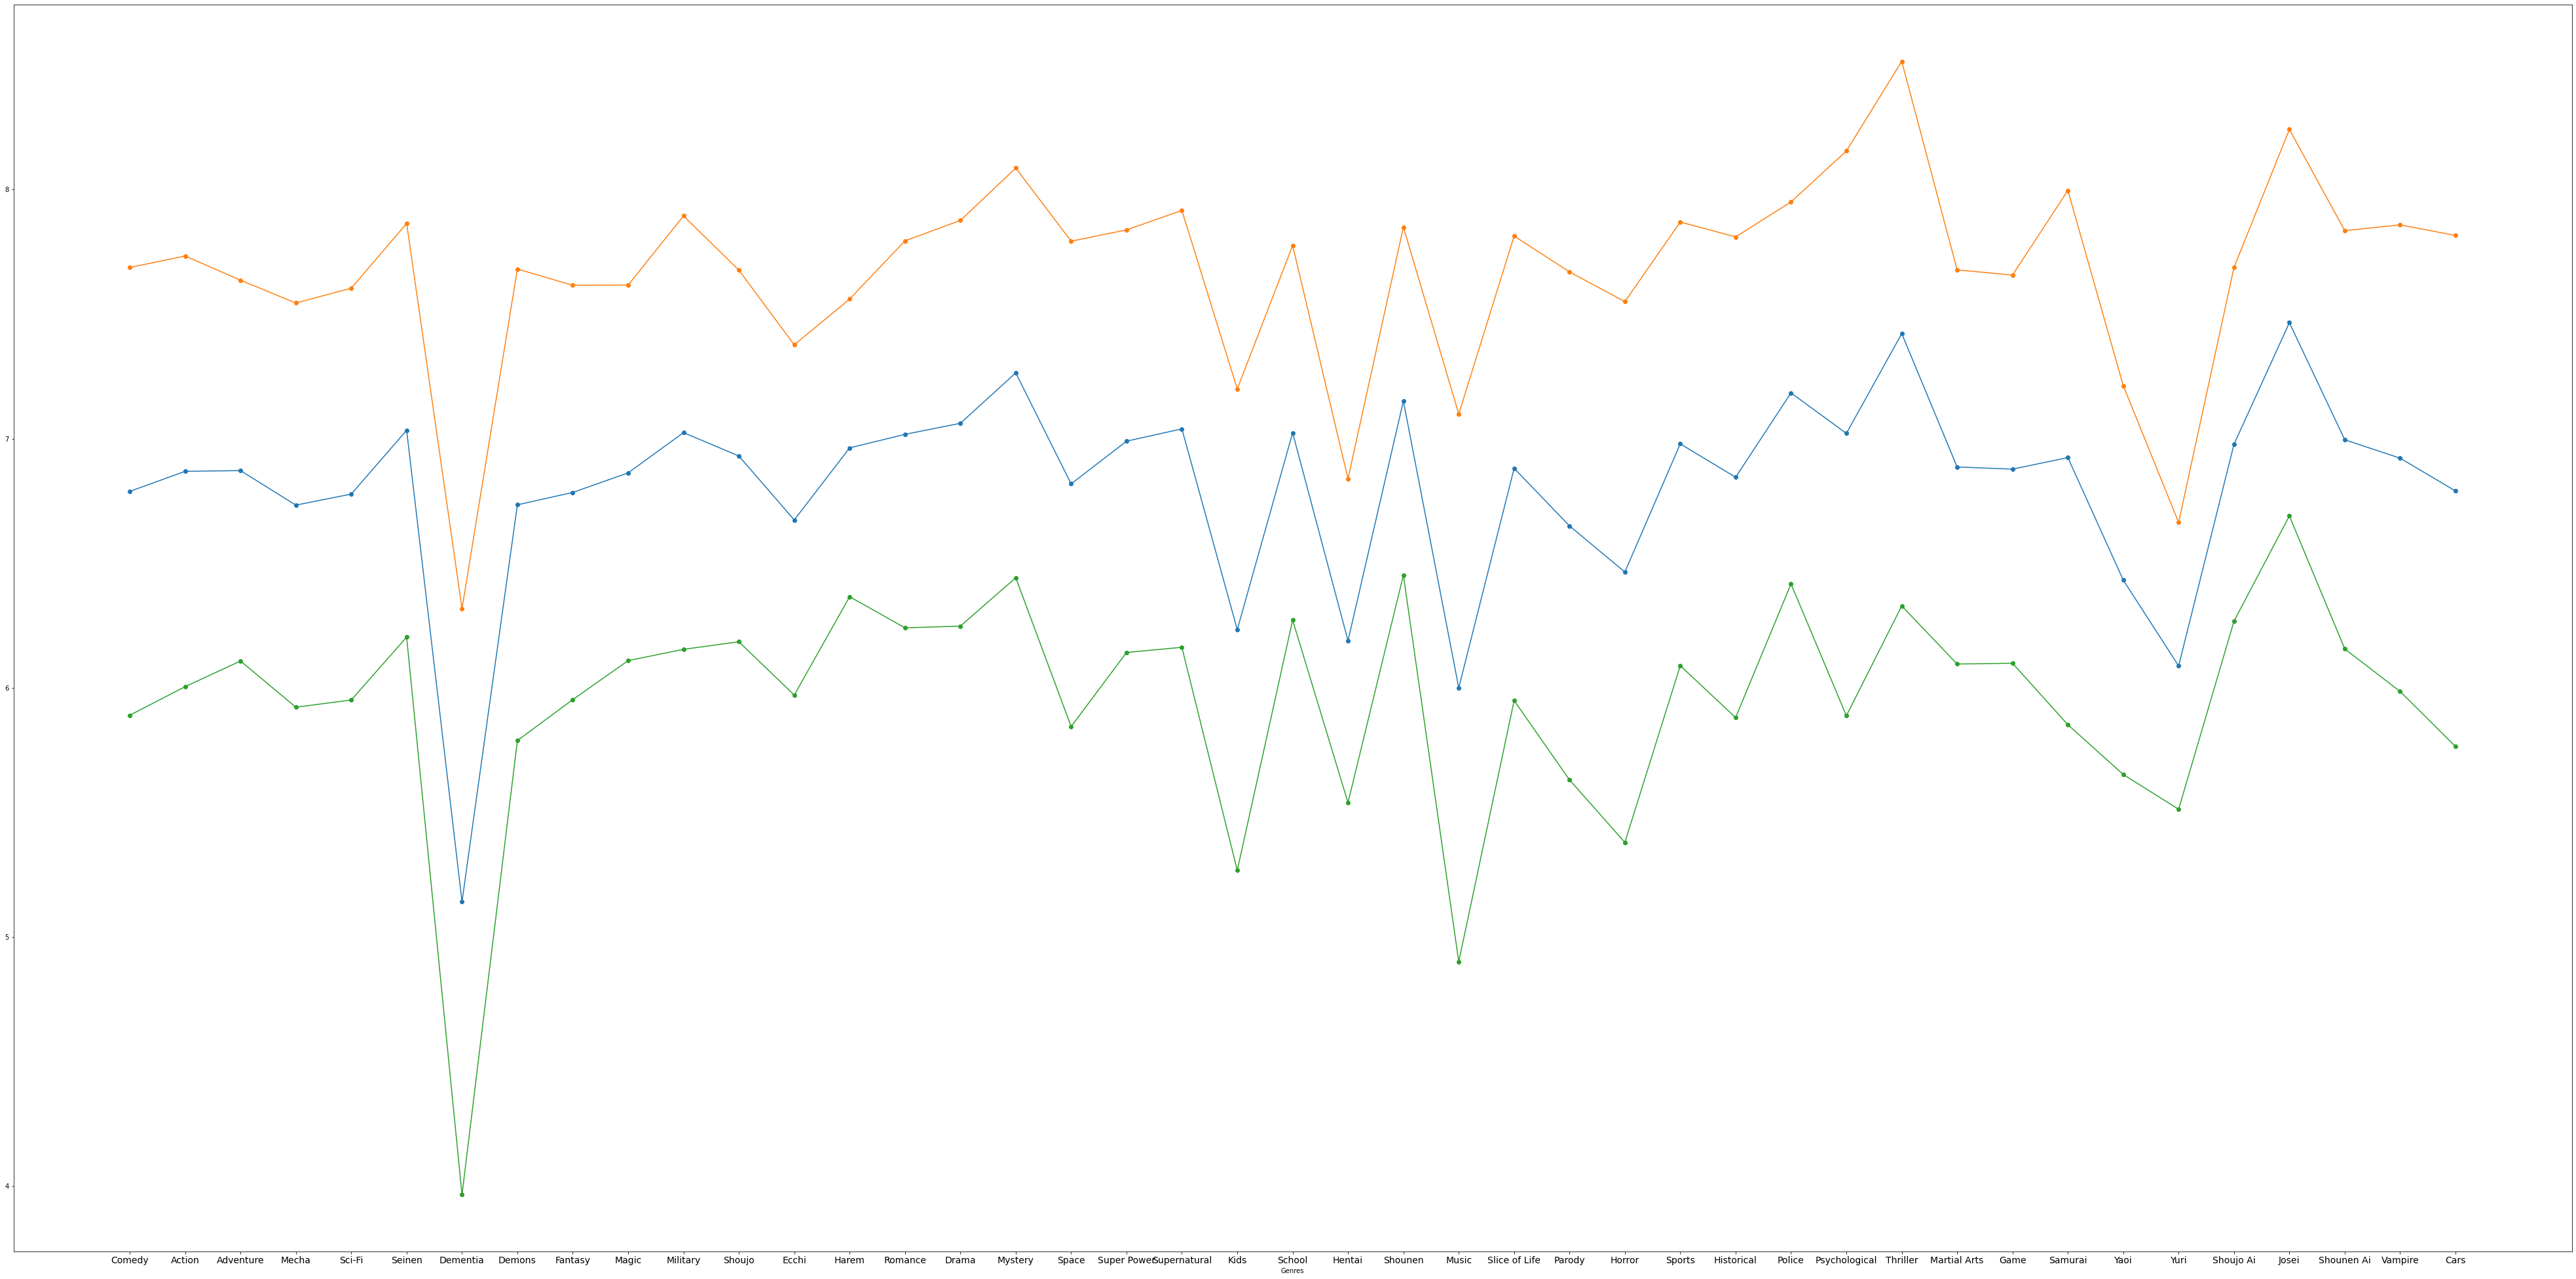

In [23]:
# L'ultima richiesta che vi farò è quella di creare dei plot descrittivi (con matplotlib) dei dati, in particolare:
# 1) scegliete tre generi e plottate in una unica riga, allineati, i boxplot che descrivono la distribuzione dei loro ratings
ax=plt.boxplot([anime['rating'][anime['Adventure'] == 1].values, 
             anime['rating'][anime['Mystery'] == 1].values,  
             anime['rating'][anime['Thriller'] == 1].values],
             whis=1.5,
             labels=['Adventure', 'Mystery', 'Thriller'])
plt.show()
# 2) create un pie chart per i generi
plt.figure(figsize=(20,10))
p = plt.pie(genres_count.values(), labels=genres_count.keys())
plt.show()
# 3) plottate in un unico grafico, uno dopo l'altro, la media dei ratings per ogni genere, la media meno la deviazione standard
# e la media più la deviazione standard, in modo da avere per ogni genere una sorta di intervallo di confidenza per i ratings
ratings_mean=np.zeros(len(genres_count))
ratings_std=np.zeros(len(genres_count))
genre = np.array(list(genres_count.keys()))
for i in range(len(genres_count)):
    ratings_mean[i] = anime.groupby(genre[i]).mean()['rating'][1]
    ratings_std[i] = anime.groupby(genre[i]).std()['rating'][1]
plt.figure(figsize=(70,35))
plt.plot(genres_count.keys(),ratings_mean,'-o', genres_count.keys(),ratings_mean + ratings_std,'-o', genres_count.keys(),
         ratings_mean - ratings_std, '-o')
plt.xticks(fontsize=14)
plt.xlabel('Genres')
plt.show()

In [24]:
# ANALISI LIBERA
# Adesso le possibilità sono pressoché infinite, potete studiare settorialmente i generi, i type, le distribuzioni dei rating 
# nelle varie sottofamiglie, etc.
# Questo è un ottimo dataset per esercitarsi a gestire feature binarie e metodi di classificazione o regressione molto semplici,
# per chi è interessato all'ambito Data Science è sicuramente un ottimo esercizio. Per chiunque avesse curiosità a riguardo 
# o semplicemente cercasse consigli è libero di contattarmi: Gianmarco Genalti +393479163061